# Proyek Analisis Data: [Ahmad Zaky Humami Dataset E-Commerce Public Dataset ]
- **Nama:** Ahmad Zaky Humami
- **Email:** humami539@gmail.com
- **ID Dicoding:** MC009D5Y0493

## Menentukan Pertanyaan Bisnis

- Bagaimana tren jumlah pesanan per bulan?
- Metode pembayaran apa yang paling banyak digunakan?
- Bagaimana rating rata-rata berdasarkan kategori produk?
- Bagaimana segmentasi pelanggan berdasarkan RFM Analysis?
- Bagaimana distribusi geografis pesanan berdasarkan lokasi pelanggan?
- Bagaimana pengelompokan kategori produk berdasarkan jumlah penjualan?

## Import Semua Packages/Library yang Digunakan

In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import geopandas as gpd
import folium
import altair as alt
import datetime as dt

In [79]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Data Wrangling

### Gathering Data

In [80]:
print("Dataset Customers:")
customers = pd.read_csv("/content/drive/MyDrive/Data/customers_dataset.csv")
customers.head()

Dataset Customers:


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [81]:
print("Dataset Orders:")
orders = pd.read_csv("/content/drive/MyDrive/Data/orders_dataset.csv")
orders.head()

Dataset Orders:


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [82]:
print("Dataset Order Payments:")
order_payments = pd.read_csv("/content/drive/MyDrive/Data/order_payments_dataset.csv")
order_payments.head()

Dataset Order Payments:


,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [83]:
print("Dataset Order Reviews:")
order_reviews = pd.read_csv("/content/drive/MyDrive/Data/order_reviews_dataset.csv")
order_reviews.head()

Dataset Order Reviews:


,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [84]:
print("Dataset Order Items:")
order_items = pd.read_csv("/content/drive/MyDrive/Data/order_items_dataset.csv")
order_items.head()

Dataset Order Items:


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [85]:
print("Dataset Products:")
products = pd.read_csv("/content/drive/MyDrive/Data/products_dataset.csv")
products.head()

Dataset Products:


,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [86]:
print("Dataset Product Category:")
product_category = pd.read_csv("/content/drive/MyDrive/Data/product_category_name_translation.csv")
product_category.head()

Dataset Product Category:


,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [87]:
print("Dataset Geolocation:")
geolocation = pd.read_csv("/content/drive/MyDrive/Data/geolocation_dataset.csv")
geolocation.head()

Dataset Geolocation:


,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


**Insight:**
 - Dataset `orders` berisi informasi pesanan, termasuk timestamp pembelian.
 - Dataset `order_payments` berisi metode pembayaran yang digunakan pelanggan.
 - Dataset `order_reviews` menyimpan ulasan dan rating dari pelanggan.
 - Dataset `order_items` menghubungkan produk dengan pesanan.
 - Dataset `products` dan `product_category` menyediakan informasi kategori produk.
 - Data ini sudah cukup untuk menjawab pertanyaan tentang tren pesanan, metode pembayaran, dan rating produk.

### Assessing Data

#### Menilai Tabel `customers`

##### Info Table `customers`

In [89]:
print("Customers INFO\n")
print(customers.info())

Customers INFO

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB
None


##### Missing Values Table `customers`

In [90]:
print("Customers MISSING VALUES\n")
print(customers.isnull().sum())
print("\nJumlah duplikasi: ", customers.duplicated().sum())

Customers MISSING VALUES

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

Jumlah duplikasi:  0


##### Descriptive Statistic Tables `customers`

In [91]:
print("Customers DESCRIPTIVE STATISTICS\n")
customers.describe()

Customers DESCRIPTIVE STATISTICS



,customer_zip_code_prefix
count,99441.000000
mean,35137.474583
std,29797.938996
min,1003.000000
25%,11347.000000
50%,24416.000000
75%,58900.000000
max,99990.000000


#### Menilai Tabel `orders`

##### Info Table `orders`

In [92]:
print("Orders INFO\n")
print(orders.info())

Orders INFO

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB
None


##### Missing Values Table `orders`

In [93]:
print("Orders MISSING VALUES\n")
print(orders.isnull().sum())
print("\nJumlah duplikasi: ", orders.duplicated().sum())

Orders MISSING VALUES

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

Jumlah duplikasi:  0


##### Descriptive Statistic Tables `orders`

In [94]:
print("Orders DESCRIPTIVE STATISTICS\n")
orders.describe()

Orders DESCRIPTIVE STATISTICS



,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2018-04-11 10:48:14,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 23:38:46,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


#### Menilai Table `order_payments`

##### Info Tables `order_payments`

In [95]:
print("\nOrder Payments INFO\n")
print(order_payments.info())


Order Payments INFO

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB
None


##### Missing Values Table `order_payments`

In [96]:
print("\nOrder Payments MISSING VALUES\n")
print(order_payments.isnull().sum())
print("\nJumlah duplikasi: ", order_payments.duplicated().sum())


Order Payments MISSING VALUES

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

Jumlah duplikasi:  0


##### Descriptive Statistic `order_payments`

In [97]:
print("\nOrder Payments DESCRIPTIVE STATISTICS\n")
order_payments.describe()


Order Payments DESCRIPTIVE STATISTICS



,payment_sequential,payment_installments,payment_value
count,103886.000000,103886.000000,103886.000000
mean,1.092679,2.853349,154.100380
std,0.706584,2.687051,217.494064
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,56.790000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.837500
max,29.000000,24.000000,13664.080000


#### Menilai Table `order_reviews`

##### Info Table `order_reviews`

In [98]:
print("Order Reviews INFO\n")
print(order_reviews.info())

Order Reviews INFO

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB
None


##### Missing Values Table `order_reviews`

In [99]:
print("Order Reviews MISSING VALUES\n")
print(order_reviews.isnull().sum())
print("\nJumlah duplikasi: ", order_reviews.duplicated().sum())

Order Reviews MISSING VALUES

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

Jumlah duplikasi:  0


##### Descriptive Statistic `order_reviews`

In [100]:
print("Order Reviews DESCRIPTIVE STATISTICS\n")
order_reviews.describe()

Order Reviews DESCRIPTIVE STATISTICS



,review_score
count,99224.000000
mean,4.086421
std,1.347579
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


#### Menilai Table `order_items`

##### Info Table `order_items`

In [101]:
print("Order Items INFO\n")
print(order_items.info())

Order Items INFO

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB
None


##### Missing Values Table `order_items`

In [102]:
print("Order Items MISSING VALUES\n")
print(order_items.isnull().sum())
print("\nJumlah duplikasi: ", order_items.duplicated().sum())

Order Items MISSING VALUES

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

Jumlah duplikasi:  0


##### Descriptive Statistic `order_items`

In [103]:
print("Order Items DESCRIPTIVE STATISTICS\n")
order_items.describe()

Order Items DESCRIPTIVE STATISTICS



,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


#### Menilai Table `products`

##### Info Table `products`

In [104]:
print("Products INFO\n")
print(products.info())

Products INFO

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB
None


##### Missing Values Table `products`

In [105]:
print("Products MISSING VALUES\n")
print(products.isna().sum())
print("\nJumlah duplikasi: ", products.duplicated().sum())

Products MISSING VALUES

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

Jumlah duplikasi:  0


##### Descriptive Statistic `products`

In [106]:
print("Products DESCRIPTIVE STATISTICS\n")
products.describe()

Products DESCRIPTIVE STATISTICS



,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
mean,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


#### Menilai Table `product_category`

##### Info Table `product_category`

In [107]:
print("Product Category INFO\n")
print(product_category.info())

Product Category INFO

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB
None


##### Missing Values Table `product_category`

In [108]:
print("Product Category MISSING VALUES\n")
print(product_category.isna().sum())
print("\nJumlah duplikasi: ", product_category.duplicated().sum())

Product Category MISSING VALUES

product_category_name            0
product_category_name_english    0
dtype: int64

Jumlah duplikasi:  0


##### Descriptive Statistic `product_category`

In [109]:
print("Product Category DESCRIPTIVE STATISTICS\n")
product_category.describe()

Product Category DESCRIPTIVE STATISTICS



,product_category_name,product_category_name_english
count,71,71
unique,71,71
top,beleza_saude,health_beauty
freq,1,1


#### Menilai Table `geolocation`

##### Info Table `geolocation`

In [110]:
print("Geolocation INFO\n")
print(geolocation.info())

Geolocation INFO

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB
None


##### Missing Values Table `geolocation`

In [111]:
print("Geolocation MISSING VALUES\n")
print(geolocation.isna().sum())
print("\nJumlah duplikasi: ", geolocation.duplicated().sum())

Geolocation MISSING VALUES

geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64

Jumlah duplikasi:  261836


##### Descriptive Statistic `geolocation`

In [112]:
print("Geolocation DESCRIPTIVE STATISTICS\n")
geolocation.describe()

Geolocation DESCRIPTIVE STATISTICS



,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng
count,1.000163e+06,1.000163e+06,1.000163e+06
mean,3.657417e+04,-2.117615e+01,-4.639054e+01
std,3.054934e+04,5.715866e+00,4.269748e+00
min,1.001000e+03,-3.660537e+01,-1.014668e+02
25%,1.107500e+04,-2.360355e+01,-4.857317e+01
50%,2.653000e+04,-2.291938e+01,-4.663788e+01
75%,6.350400e+04,-1.997962e+01,-4.376771e+01
max,9.999000e+04,4.506593e+01,1.211054e+02


### Insight

- Dataset memiliki berbagai tipe data yang perlu diperiksa sebelum analisis lebih lanjut.
- Beberapa dataset memiliki missing values, terutama di `orders` pada kolom timestamp pembelian.
- Data rating di `order_reviews` juga memiliki missing values yang perlu dibersihkan.
- Perlu memastikan semua data bertipe sesuai untuk analisis lebih lanjut.

### Cleaning Data

#### Membersihkan Table `orders`

In [113]:
print("Kesalahan Tipe Data pada beberapa column di Table orders\n")
print(orders.info())

Kesalahan Tipe Data pada beberapa column di Table orders

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB
None


In [114]:
orders['order_purchase_timestamp'] = pd.to_datetime(orders['order_purchase_timestamp'])
orders['order_approved_at'] = pd.to_datetime(orders['order_approved_at'])
orders['order_delivered_carrier_date'] = pd.to_datetime(orders['order_delivered_carrier_date'])
orders['order_delivered_customer_date'] = pd.to_datetime(orders['order_delivered_customer_date'])
orders['order_estimated_delivery_date'] = pd.to_datetime(orders['order_estimated_delivery_date'])

In [115]:
print("Mengubah ke Tipe Data Datetime di Table orders\n")
print(orders.info())

Mengubah ke Tipe Data Datetime di Table orders

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB
None


In [116]:
print("Orders MISSING VALUES\n")
print(orders.isnull().sum())
print("\nJumlah duplikasi: ", orders.duplicated().sum())

Orders MISSING VALUES

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

Jumlah duplikasi:  0


In [117]:
print("Cleaning Orders MISSING VALUES\n")
orders.dropna(subset=['order_approved_at'], inplace=True)
orders.dropna(subset=['order_delivered_carrier_date'], inplace=True)
orders.dropna(subset=['order_delivered_customer_date'], inplace=True)
print(orders.isnull().sum())
print("\nJumlah duplikasi: ", order_reviews.duplicated().sum())

Cleaning Orders MISSING VALUES

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
dtype: int64

Jumlah duplikasi:  0


In [118]:
print("After Cleaning Data Orders:")
orders.head()

After Cleaning Data Orders:


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26


#### Membersihkan Table `orders_reviews`

In [119]:
print("Order Reviews MISSING VALUES\n")
print(order_reviews.isnull().sum())
print("\nJumlah duplikasi: ", order_reviews.duplicated().sum())

Order Reviews MISSING VALUES

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

Jumlah duplikasi:  0


In [120]:
print("Cleaning Order Reviews MISSING VALUES\n")
order_reviews.dropna(subset=['review_comment_title', 'review_comment_message'], inplace=True)
print(order_reviews.isnull().sum())
print("\nJumlah duplikasi: ", order_reviews.duplicated().sum())

Cleaning Order Reviews MISSING VALUES

review_id                  0
order_id                   0
review_score               0
review_comment_title       0
review_comment_message     0
review_creation_date       0
review_answer_timestamp    0
dtype: int64

Jumlah duplikasi:  0


In [121]:
print("After Cleaning Data Order Reviews:")
order_reviews.head()

After Cleaning Data Order Reviews:


,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
9,8670d52e15e00043ae7de4c01cc2fe06,b9bf720beb4ab3728760088589c62129,4,recomendo,aparelho eficiente. no site a marca do aparelh...,2018-05-22 00:00:00,2018-05-23 16:45:47
15,3948b09f7c818e2d86c9a546758b2335,e51478e7e277a83743b6f9991dbfa3fb,5,Super recomendo,"Vendedor confiável, produto ok e entrega antes...",2018-05-23 00:00:00,2018-05-24 03:00:01
19,373cbeecea8286a2b66c97b1b157ec46,583174fbe37d3d5f0d6661be3aad1786,1,Não chegou meu produto,Péssimo,2018-08-15 00:00:00,2018-08-15 04:10:37
22,d21bbc789670eab777d27372ab9094cc,4fc44d78867142c627497b60a7e0228a,5,Ótimo,Loja nota 10,2018-07-10 00:00:00,2018-07-11 14:10:25
34,c92cdd7dd544a01aa35137f901669cdf,37e7875cdce5a9e5b3a692971f370151,4,Muito bom.,Recebi exatamente o que esperava. As demais en...,2018-06-07 00:00:00,2018-06-09 18:44:02


#### Membersihkan Table `orders_items`

In [122]:
print("Order Items INFO\n")
print(order_items.info())

Order Items INFO

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB
None


In [123]:
order_items['shipping_limit_date'] = pd.to_datetime(order_items['shipping_limit_date'])
print("After Cleaning Data Order Items:")
print(order_items.info())

After Cleaning Data Order Items:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  int64         
 2   product_id           112650 non-null  object        
 3   seller_id            112650 non-null  object        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  float64       
 6   freight_value        112650 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 6.0+ MB
None


#### Membersihkan Table `products`

In [124]:
print("Products MISSING VALUES\n")
print(products.isna().sum())
print("\nJumlah duplikasi: ", products.duplicated().sum())

Products MISSING VALUES

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

Jumlah duplikasi:  0


In [125]:
print("Cleaning Products MISSING VALUES\n")
products.fillna({'product_category_name' : 'unknown'}, inplace=True)
print(products.isna().sum())

Cleaning Products MISSING VALUES

product_id                      0
product_category_name           0
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64


In [126]:
for col in ['product_name_lenght', 'product_description_lenght', 'product_photos_qty', 'product_weight_g']:
    median_value = products[col].median()
    products[col] = products[col].fillna(median_value)  # Assign the result back to the column
# Replace missing values in 'product_length_cm', 'product_height_cm', and 'product_width_cm' with their respective medians
for col in ['product_length_cm', 'product_height_cm', 'product_width_cm']:
    median_value = products[col].median()
    products[col] = products[col].fillna(median_value)  # Assign the result back to the column

print(products.isna().sum())
print("\nJumlah duplikasi: ", products.duplicated().sum())

product_id                    0
product_category_name         0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              0
product_length_cm             0
product_height_cm             0
product_width_cm              0
dtype: int64

Jumlah duplikasi:  0


In [127]:
print("After Cleaning Data Products:")
products.head()

After Cleaning Data Products:


,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


#### Membersihkan Table `geolocation`

In [128]:
print("Geolocation MISSING VALUES\n")
print(geolocation.isna().sum())
print("\nJumlah duplikasi: ", geolocation.duplicated().sum())

Geolocation MISSING VALUES

geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64

Jumlah duplikasi:  261836


In [129]:
geolocation = geolocation.drop_duplicates(subset=['geolocation_zip_code_prefix'])
print("\nJumlah duplikasi setelah cleaning: ", geolocation.duplicated().sum())


Jumlah duplikasi setelah cleaning:  0


In [130]:
print("After Cleaning Data Geolocation:")
geolocation.head()

After Cleaning Data Geolocation:


,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP
5,1012,-23.547762,-46.635361,são paulo,SP


### **Insight:**
- Konversi timestamp memastikan bisa menganalisis tren waktu dengan benar.
- Semua kolom timestamp telah dikonversi ke format datetime untuk memudahkan analisis waktu.
- Menghapus missing values pada kolom memastikan tidak ada bias dalam perhitungan statistik.
- Data kini lebih siap digunakan dalam analisis lebih lanjut.


## Exploratory Data Analysis (EDA)

### Explore...


Merge `orders` dan `oreder_items` untuk Transaksi per Bulan

In [132]:
# Merge orders and order_items to get prices
orders_with_prices = pd.merge(orders, order_items[['order_id', 'price']], on='order_id', how='left')

# Extract year and month
orders_with_prices['order_month'] = orders_with_prices['order_purchase_timestamp'].dt.to_period('M')

# Group by month and calculate order count and total revenue
monthly_data = orders_with_prices.groupby('order_month').agg(
    order_count=('order_id', 'nunique'),  # Count unique orders
    total_revenue=('price', 'sum')      # Sum of prices for total revenue
).reset_index()

# Rename columns for clarity
monthly_data.columns = ['Month', 'Order_Count', 'Total_Revenue']

# Display the table
monthly_data

,Month,Order_Count,Total_Revenue
0,2016-09,1,134.97
1,2016-10,270,40941.30
2,2016-12,1,10.90
3,2017-01,748,111712.47
4,2017-02,1641,232638.86
5,2017-03,2546,359198.85
6,2017-04,2303,340669.68
7,2017-05,3545,489159.25
8,2017-06,3135,421923.37
9,2017-07,3872,481604.52


Merge `orders` dan `oreder_payments` untuk Metode Pembayaran

In [133]:
# Merge the necessary DataFrames
paymentOrder_df = pd.merge(orders, order_payments, on='order_id', how='inner')

# Analyze payment methods
payment_counts = paymentOrder_df['payment_type'].value_counts().reset_index()
payment_counts.columns = ['Payment Type', 'Count']

# Display the table
payment_counts

,Payment Type,Count
0,credit_card,74584
1,boleto,19177
2,voucher,5493
3,debit_card,1485


Merge `order_reviews` dan `oreder_items` untuk Rate Score

In [134]:
# Merge necessary DataFrames
itemReview_df = pd.merge(order_reviews, order_items, on='order_id', how='inner')
itemReview_df = pd.merge(itemReview_df, products, on='product_id', how='inner')

# Group by product category and calculate the average rating
average_rating_by_category = itemReview_df.groupby('product_category_name')['review_score'].mean().reset_index()

# Display the table
average_rating_by_category

,product_category_name,review_score
0,agro_industria_e_comercio,3.294118
1,alimentos,4.046875
2,alimentos_bebidas,4.052632
3,artes,3.647059
4,artes_e_artesanato,3.000000
...,...,...
63,tablets_impressao_imagem,5.000000
64,telefonia,3.677273
65,telefonia_fixa,3.222222
66,unknown,3.384615


Merge Semua dataset untuk melakukan RFM Analisis

In [135]:
allRfm_df = pd.merge(orders, order_items, on='order_id', how='left')
allRfm_df = pd.merge(allRfm_df, customers, on='customer_id', how='left')
allRfm_df = pd.merge(allRfm_df, order_payments, on='order_id', how='left')

Menampilkan group by Frequency, Monetary, Recency

In [136]:
# Create a total price column
allRfm_df['total_price'] = allRfm_df['price'] * allRfm_df['order_item_id'] # Assuming order_item_id represents quantity

# Rename 'order_purchase_timestamp' to 'order_date' for consistency
allRfm_df.rename(columns={'order_purchase_timestamp': 'order_date'}, inplace=True)

rfm_df = allRfm_df.groupby(by="customer_id", as_index=False).agg({
    "order_date": "max", # mengambil tanggal order terakhir
    "order_id": "nunique", # menghitung jumlah order
    "total_price": "sum" # menghitung jumlah revenue yang dihasilkan
})
rfm_df.columns = ["customer_id", "max_order_timestamp", "frequency", "monetary"]

# menghitung kapan terakhir pelanggan melakukan transaksi (hari)
rfm_df["max_order_timestamp"] = rfm_df["max_order_timestamp"].dt.date
recent_date = allRfm_df["order_date"].dt.date.max()  # Use allRfm_df instead of orders_df
rfm_df["recency"] = rfm_df["max_order_timestamp"].apply(lambda x: (recent_date - x).days)

rfm_df.drop("max_order_timestamp", axis=1, inplace=True)
rfm_df.head()


,customer_id,frequency,monetary,recency
0,00012a2ce6f8dcda20d059ce98491703,1,89.80,288
1,000161a058600d5901f007fab4c27140,1,54.90,409
2,0001fd6190edaaf884bcaf3d49edf079,1,179.99,547
3,0002414f95344307404f0ace7a26f1d5,1,149.90,378
4,000379cdec625522490c315e70c7a9fb,1,93.00,149


Merge `orders` dan `customers` untuk Distribusi Geografis Pesanan

In [137]:
# Merge necessary DataFrames
geodist_df = pd.merge(orders, customers, on='customer_id', how='inner')
# The 'customer_zip_code_prefix' column is in customers DataFrame, so it should be in geodist_df now.
# Change 'geolocation_zip_code_prefix' to 'customer_zip_code_prefix' in geolocation
geolocation.rename(columns={'geolocation_zip_code_prefix': 'customer_zip_code_prefix'}, inplace=True)
geodist_df = pd.merge(geodist_df, geolocation, on='customer_zip_code_prefix', how='left')

# Group by customer location and count the orders
order_distribution = geodist_df.groupby(['customer_city', 'customer_state'])['order_id'].count().reset_index()
order_distribution.rename(columns={'order_id': 'order_count'}, inplace=True)

# Display the table
order_distribution

,customer_city,customer_state,order_count
0,abadia dos dourados,MG,3
1,abadiania,GO,1
2,abaete,MG,11
3,abaetetuba,PA,11
4,abaiara,CE,2
...,...,...,...
4267,xinguara,PA,9
4268,xique-xique,BA,3
4269,zacarias,SP,2
4270,ze doca,MA,5


Merge `orders`, `order_items`, dan `products` untuk Pengelompokan Kategori Produk

In [138]:
# Merge necessary DataFrames
category_segment = pd.merge(orders, order_items, on='order_id', how='inner')
category_segment = pd.merge(category_segment, products, on='product_id', how='inner')

# Group by product category and sum the prices to find the total sales per category
sales_by_category = category_segment.groupby('product_category_name')['price'].sum().reset_index()
sales_by_category.rename(columns={'price': 'total_sales'}, inplace=True)

# Sort the categories by total sales in descending order
sales_by_category = sales_by_category.sort_values(by='total_sales', ascending=False)

# Display the table
sales_by_category


,product_category_name,total_sales
11,beleza_saude,1233211.61
66,relogios_presentes,1165898.98
13,cama_mesa_banho,1023300.77
32,esporte_lazer,954626.07
44,informatica_acessorios,888613.62
...,...,...
41,flores,1110.04
15,casa_conforto_2,760.27
17,cds_dvds_musicais,730.00
37,fashion_roupa_infanto_juvenil,519.95


### **Insight:**

- Dengan melihat `Order_Count` dan `Total_Revenue`, kita dapat mengidentifikasi bulan-bulan dengan penjualan tertinggi dan terendah. Informasi ini penting untuk memahami siklus bisnis dan merencanakan strategi penjualan.

- Dari tabel `payment_counts`, kita bisa melihat metode pembayaran mana yang memiliki jumlah transaksi (Count) paling tinggi. Informasi ini sangat penting untuk bisnis, karena dapat membantu dalam:
  - Optimasi Proses Pembayaran
  - Strategi Pemasaran
  - Pengambilan Keputusan Bisnis

- Dengan menggabungkan data dari tabel `order_reviews`, `order_items`, dan `products` dapat mengetahui kategori produk yang memiliki rating rata-rata tinggi, bisnis dapat mengidentifikasi produk-produk unggulan yang disukai pelanggan. Informasi ini berguna untuk strategi pemasaran dan pengembangan produk.

- RFM analysis membantu dalam mengidentifikasi pelanggan yang paling berharga (loyal, sering bertransaksi, dan menghasilkan revenue tinggi).
Dengan segmentasi pelanggan, bisnis dapat menerapkan strategi pemasaran yang lebih personal dan efektif untuk setiap kelompok pelanggan.

- Dengan menggabungkan data dari tabel `orders`, `customers`, dan `geolocation` untuk menghitung jumlah pesanan di setiap kota dan negara bagian. Dapat digunakan untuk mengoptimalkan strategi pemasaran, inventaris, dan logistik.

- Analisis penjualan per kategori produk membantu mengidentifikasi kategori yang menghasilkan pendapatan terbesar. Bisnis dapat fokus pada kategori terlaris dan mengoptimalkan strategi pemasaran untuk kategori tersebut.

## Visualization & Explanatory Analysis

### Bagaimana tren jumlah pesanan per bulan?

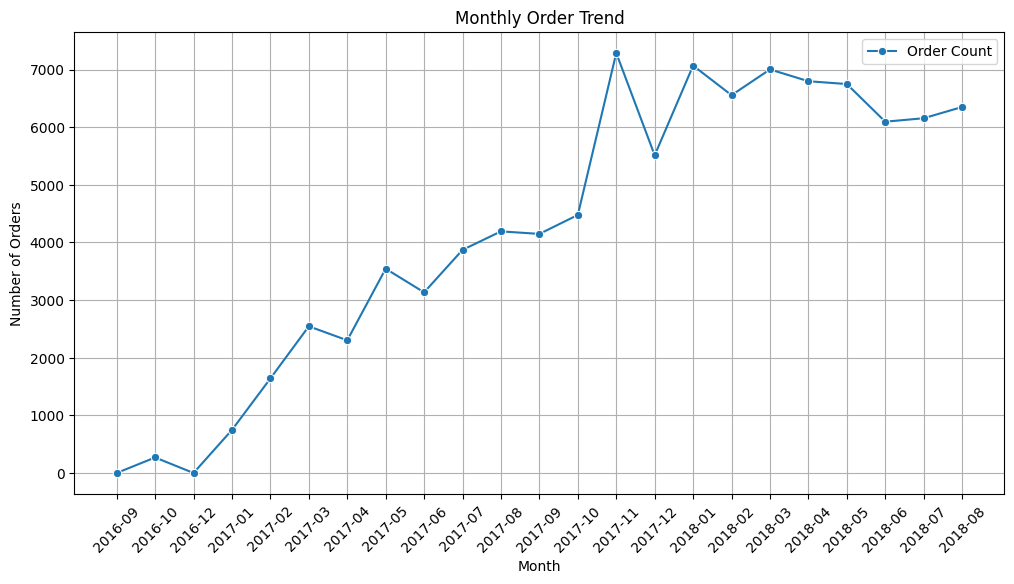

In [139]:
# Create the visualization
plt.figure(figsize=(12, 6))
# Convert 'Month' column to string before plotting
sns.lineplot(x=monthly_data['Month'].astype(str), y='Order_Count', data=monthly_data, marker='o', label='Order Count')
plt.xlabel('Month')
plt.ylabel('Number of Orders')
plt.title('Monthly Order Trend')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()

### Metode pembayaran apa yang paling banyak digunakan?

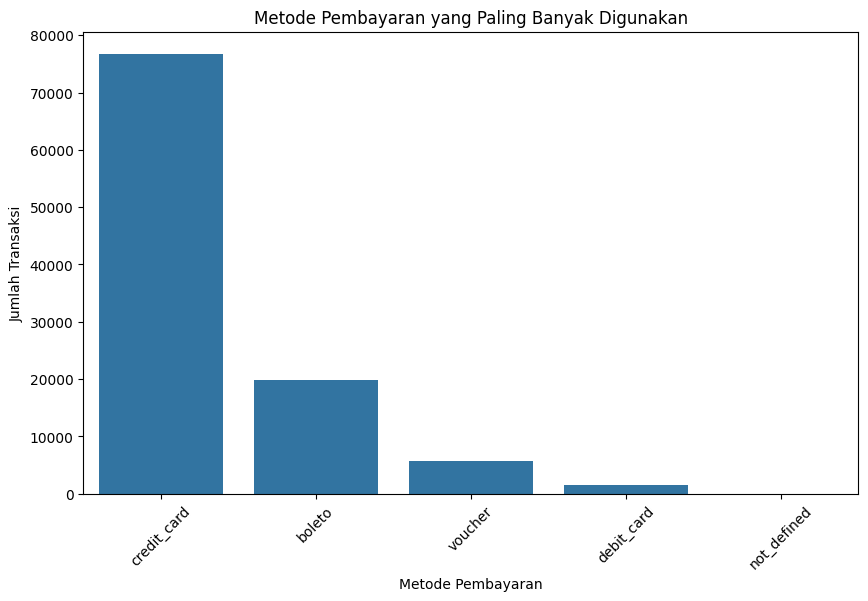

In [140]:
payment_counts = order_payments['payment_type'].value_counts()

# Visualisasi metode pembayaran yang paling banyak digunakan menggunakan Seaborn
plt.figure(figsize=(10, 6))
sns.countplot(x='payment_type', data=order_payments, order=payment_counts.index)
plt.title('Metode Pembayaran yang Paling Banyak Digunakan')
plt.xlabel('Metode Pembayaran')
plt.ylabel('Jumlah Transaksi')
plt.xticks(rotation=45)
plt.show()

### Bagaimana rating rata-rata berdasarkan kategori produk?

In [141]:
# Assuming 'average_rating_by_category' DataFrame is already created as in your provided code.

# Sort by average rating in descending order and get the top 10
top_10_categories = average_rating_by_category.sort_values(by='review_score', ascending=False).head(10)

# Create the horizontal bar chart using Plotly Express
fig = px.bar(top_10_categories,
             x='review_score',
             y='product_category_name',
             orientation='h',
             title='Top 10 Product Categories by Average Rating',
             labels={'review_score': 'Average Rating', 'product_category_name': 'Product Category'})

fig.show()

### Bagaimana segmentasi pelanggan berdasarkan RFM Analysis?

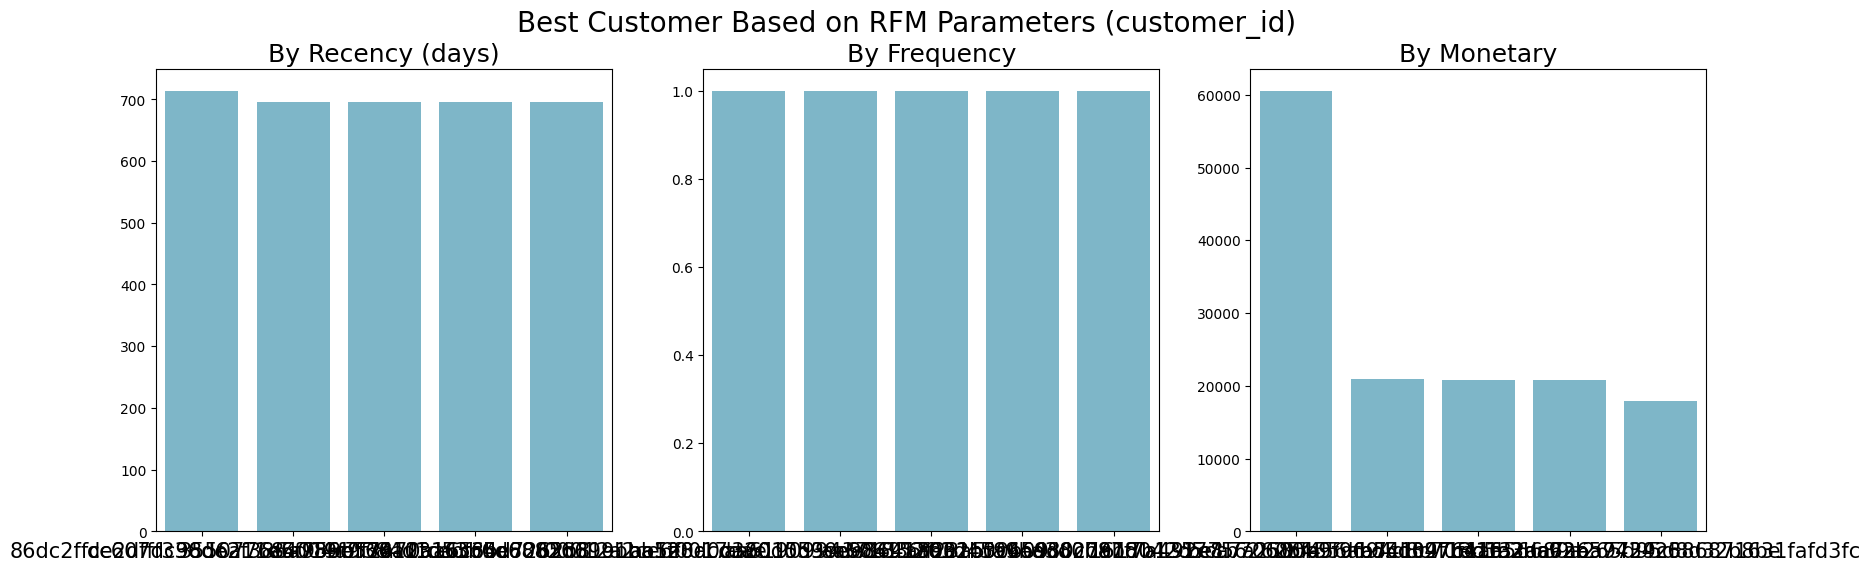

In [142]:
# Create three subplots (1 row, 3 columns)
fig, axs = plt.subplots(1, 3, figsize=(20, 6))

# Bar plot for Recency
colors = ["#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4"]
sns.barplot(y="recency", x="customer_id", data=rfm_df.sort_values(by="recency", ascending=False).head(5), hue="customer_id", palette=colors, dodge=False, ax=axs[0])
axs[0].set_ylabel(None)
axs[0].set_xlabel(None)
axs[0].set_title("By Recency (days)", loc="center", fontsize=18)
axs[0].tick_params(axis='x', labelsize=15)
axs[0].legend([],[], frameon=False) # Disable legend

# Bar plot for Frequency
sns.barplot(y="frequency", x="customer_id", data=rfm_df.sort_values(by="frequency", ascending=False).head(5), hue="customer_id", palette=colors, dodge=False, ax=axs[1])
axs[1].set_ylabel(None)
axs[1].set_xlabel(None)
axs[1].set_title("By Frequency", loc="center", fontsize=18)
axs[1].tick_params(axis='x', labelsize=15)
axs[1].legend([],[], frameon=False) # Disable legend

# Bar plot for Monetary
sns.barplot(y="monetary", x="customer_id", data=rfm_df.sort_values(by="monetary", ascending=False).head(5), hue="customer_id", palette=colors, dodge=False, ax=axs[2])
axs[2].set_ylabel(None)
axs[2].set_xlabel(None)
axs[2].set_title("By Monetary", loc="center", fontsize=18)
axs[2].tick_params(axis='x', labelsize=15)
axs[2].legend([],[], frameon=False) # Disable legend

# Main title for the entire figure
plt.suptitle("Best Customer Based on RFM Parameters (customer_id)", fontsize=20)
plt.show()

### Bagaimana distribusi geografis pesanan berdasarkan lokasi pelanggan?

In [143]:
# 2. Buat Peta Choropleth
fig = px.choropleth(order_distribution,
                    locations='customer_state',
                    locationmode="country names",
                    color='order_count',
                    hover_name='customer_city',
                    title='Distribusi Geografis Pesanan di Brazil',
                    color_continuous_scale='Viridis')

# 3. Perbarui Geos untuk Fokus pada Brazil
fig.update_geos(
    fitbounds="locations",
    visible=False,
    scope="south america",  # Atau 'world' jika ingin tampilan lebih luas
)

fig.show()

### Bagaimana pengelompokan kategori produk berdasarkan jumlah penjualan?

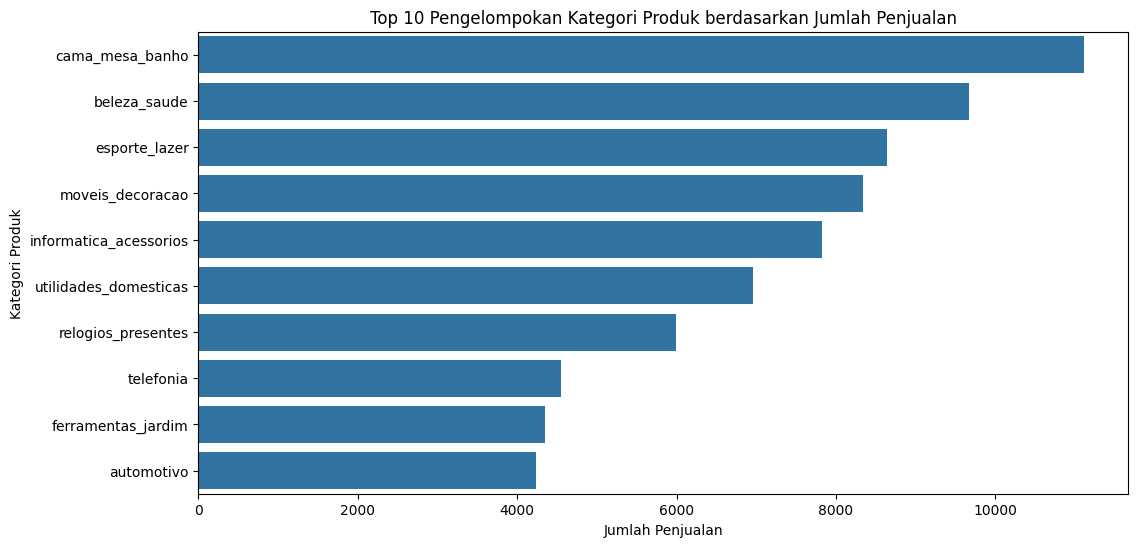

In [144]:
category_sales = order_items.merge(products, on='product_id', how='left')
category_sales = category_sales.groupby('product_category_name')['order_id'].count().reset_index()
category_sales = category_sales.sort_values(by='order_id', ascending=False)

# Select the top N categories (e.g., top 10)
top_n = 10  # You can change this to the desired number of top categories
category_sales = category_sales.head(top_n)

plt.figure(figsize=(12, 6))

sns.barplot(y=category_sales['product_category_name'], x=category_sales['order_id'],
            dodge=False, legend=False)
plt.xlabel("Jumlah Penjualan")
plt.ylabel("Kategori Produk")
plt.title(f"Top {top_n} Pengelompokan Kategori Produk berdasarkan Jumlah Penjualan")
plt.show()

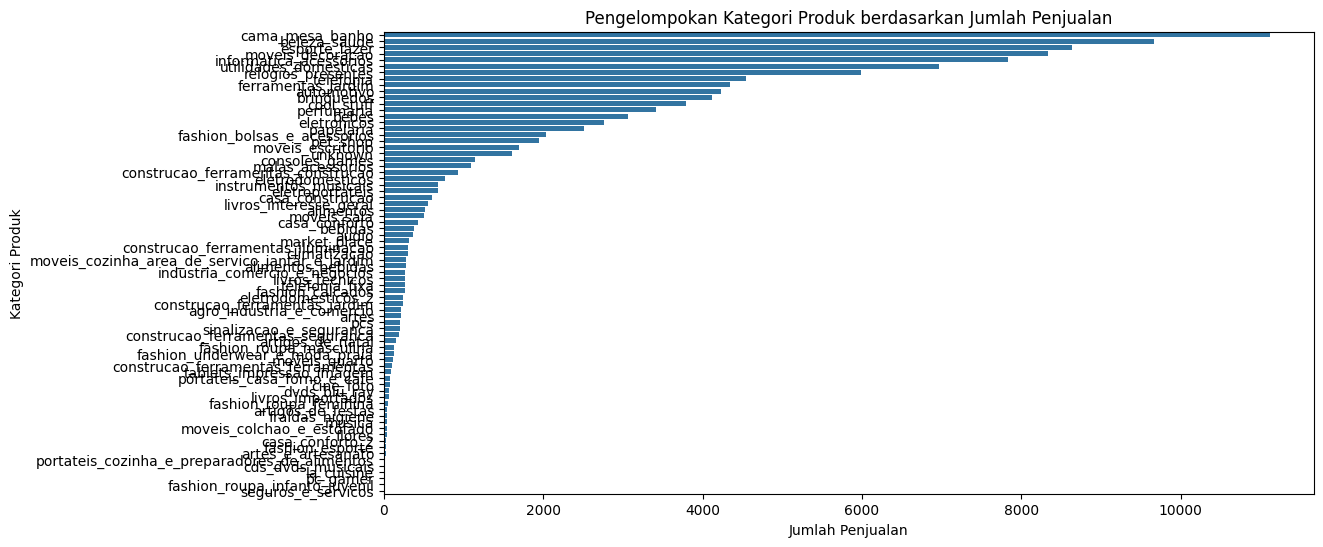

In [145]:
category_sales = order_items.merge(products, on='product_id', how='left')
category_sales = category_sales.groupby('product_category_name')['order_id'].count().reset_index()
category_sales = category_sales.sort_values(by='order_id', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(y=category_sales['product_category_name'], x=category_sales['order_id'])
plt.xlabel("Jumlah Penjualan")
plt.ylabel("Kategori Produk")
plt.title("Pengelompokan Kategori Produk berdasarkan Jumlah Penjualan")
plt.show()

## Analisis Lanjutan (Opsional)

### Apakah ada hubungan antara harga produk dan rating yang diberikan pelanggan?

Merge `order_items`, `products`, dan `order_reviews` untuk mencari keterhubungan terkait harga dan rating produk

In [146]:
# Menggabungkan dataset order_items, products, dan order_reviews
price_rating_df = order_items.merge(products, on='product_id', how='left')
price_rating_df = price_rating_df.merge(order_reviews[['order_id', 'review_score']], on='order_id', how='inner')

# Memilih kolom yang relevan
price_rating_df = price_rating_df[['product_id', 'price', 'review_score']]

# Menampilkan 5 data pertama
display(price_rating_df)


,product_id,price,review_score
0,99a4788cb24856965c36a24e339b6058,74.00,5
1,4fa33915031a8cde03dd0d3e8fb27f01,144.00,1
2,89321f94e35fc6d7903d36f74e351d40,27.90,5
3,bdcf6a834e8faa30dac3886c7a58e92e,35.90,1
4,e6b6e13cf71449a457269f425b89dc74,109.90,4
...,...,...,...
11527,fdcf45aa23bb8312ecc0027d6e1ef1c4,7.84,4
11528,fdcf45aa23bb8312ecc0027d6e1ef1c4,7.84,4
11529,fdcf45aa23bb8312ecc0027d6e1ef1c4,7.84,4
11530,dd44ecaddb22d00c140856b180f5d9b4,119.90,3


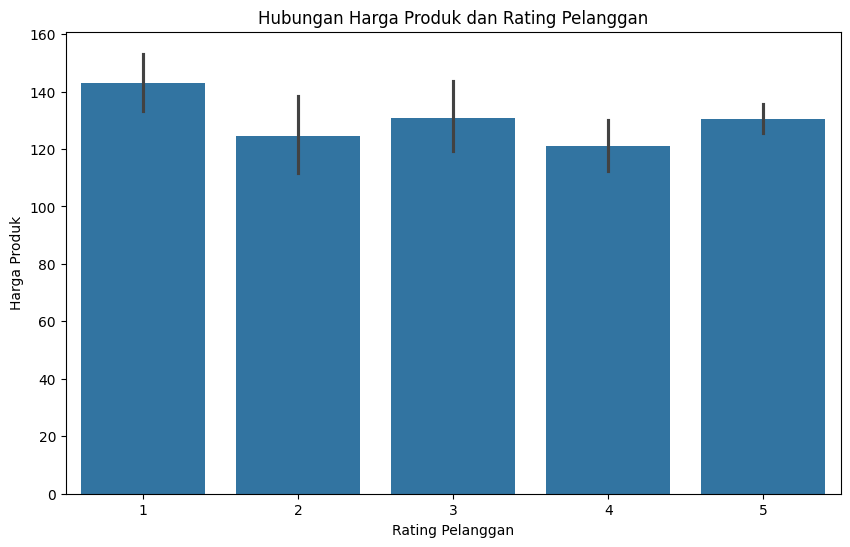

In [147]:
# Assuming 'price_rating_df' is already created as in your provided code

plt.figure(figsize=(10, 6))
sns.barplot(x='review_score', y='price', data=price_rating_df)
plt.title('Hubungan Harga Produk dan Rating Pelanggan')
plt.xlabel('Rating Pelanggan')
plt.ylabel('Harga Produk')
plt.show()


**Insight:**

- Harga Produk Tidak Berhubungan Langsung dengan Rating
> Harga produk cenderung seragam di berbagai rating, meskipun ada sedikit variasi. Ini menunjukkan bahwa pelanggan tidak selalu memberikan rating tinggi untuk produk yang lebih mahal atau rating rendah untuk produk yang lebih murah.

- Rating Rendah (1) Memiliki Rata-rata Harga Produk yang Lebih Tinggi
> Produk dengan rating 1 memiliki harga rata-rata lebih tinggi dibandingkan rating lainnya. Ini bisa mengindikasikan bahwa pelanggan memiliki ekspektasi lebih tinggi terhadap produk mahal, dan ketika ekspektasi tersebut tidak terpenuhi, mereka cenderung memberikan rating rendah.

- Rating 4 dan 5 Memiliki Harga yang Stabil
> Produk dengan rating tinggi (4 dan 5) memiliki harga rata-rata yang sedikit lebih rendah dibandingkan rating 1 dan 3, namun tetap stabil. Ini bisa berarti bahwa pelanggan puas dengan produk di rentang harga tersebut.

- Variasi Harga Lebih Besar pada Rating Rendah (1 dan 3)
> Error bar menunjukkan bahwa ada variasi harga yang lebih besar untuk produk dengan rating rendah. Hal ini dapat menunjukkan bahwa pelanggan yang memberikan rating rendah berasal dari berbagai kategori produk dengan harga yang sangat bervariasi.

## Conclusion

- Bagaimana tren jumlah pesanan per bulan?
  - Tren Pertumbuhan Positif
  > Jumlah pesanan meningkat secara signifikan dari awal tahun 2017 hingga puncaknya pada awal tahun 2018. Ini menunjukkan bahwa bisnis mengalami pertumbuhan yang kuat selama periode tersebut.

  - Lonjakan Tajam pada Akhir 2017
  > Ada lonjakan pesanan yang sangat tinggi sekitar akhir 2017 hingga awal 2018. Hal ini bisa disebabkan oleh faktor musiman seperti liburan akhir tahun, diskon besar, atau strategi pemasaran tertentu.

  - Stabilisasi Setelah Puncak
  > Setelah puncak di awal 2018, jumlah pesanan tetap tinggi tetapi mulai mengalami sedikit fluktuasi. Ini bisa menunjukkan bahwa pasar telah mencapai tingkat kestabilan atau persaingan yang meningkat.

  - Penurunan di Pertengahan 2018
  > Ada sedikit penurunan di pertengahan 2018 sebelum kembali naik secara perlahan. Hal ini bisa disebabkan oleh faktor eksternal seperti perubahan tren belanja, strategi bisnis yang berubah, atau peristiwa ekonomi tertentu.

- Metode pembayaran apa yang paling banyak digunakan?
  - Kartu Kredit Dominan
  > Sebagian besar transaksi dilakukan menggunakan credit_card, menunjukkan bahwa pelanggan lebih nyaman atau lebih sering menggunakan metode ini untuk pembayaran.

  - Boleto sebagai Alternatif Populer
  > Metode boleto (sistem pembayaran berbasis faktur di Brasil) merupakan metode pembayaran kedua yang paling banyak digunakan, meskipun jumlahnya jauh lebih rendah dibandingkan kartu kredit.

  - Metode Lainnya Kurang Diminati
  > Voucher dan debit_card memiliki jumlah transaksi yang jauh lebih sedikit dibandingkan dua metode utama.

- Bagaimana rating rata-rata berdasarkan kategori produk?

  - Kategori dengan Rating Tertinggi
  > Tablets, fashion anak, dan produk musik (CD/DVD) mendapatkan rating tertinggi dari pelanggan, menunjukkan tingkat kepuasan yang tinggi terhadap kategori ini.
  
  - Fashion dan Peralatan Rumah Tangga Mendapatkan Penilaian Baik
  > Kategori seperti fashion pria, fashion anak, dan fashion sepatu mendapatkan rating yang baik, menunjukkan bahwa pelanggan puas dengan kualitas atau layanan terkait produk ini.

    > Produk konstruksi dan furnitur juga mendapatkan rating yang cukup tinggi, menandakan kepercayaan pelanggan terhadap produk-produk ini.

  - Produk Musiman (Seperti Natal) Juga Mendapatkan Rating Positif
  > Artigos de Natal (perlengkapan Natal) menunjukkan rating yang tinggi, kemungkinan besar karena kepuasan pelanggan terhadap produk dekorasi dan musiman.

- Bagaimana segmentasi pelanggan berdasarkan RFM Analysis?
  - Recency (Kiri - Hari Sejak Transaksi Terakhir)
  > Pelanggan terbaik memiliki nilai recency yang hampir sama, menandakan mereka baru-baru ini melakukan transaksi.Ini menunjukkan bahwa mereka masih aktif dan memiliki potensi untuk transaksi lebih lanjut.

  - Frequency (Tengah - Jumlah Transaksi)
  > Semua pelanggan terbaik memiliki nilai frequency yang tinggi dan hampir sama, menandakan bahwa mereka adalah pelanggan loyal yang sering melakukan pembelian.
  
    > Pelanggan dengan frekuensi tinggi perlu mendapatkan program loyalitas atau penawaran khusus untuk mempertahankan mereka.

  - Monetary (Kanan - Total Pengeluaran)
  > Ada satu pelanggan yang secara signifikan memiliki nilai monetary yang jauh lebih tinggi dibanding yang lain. Pelanggan ini bisa jadi VIP dan layak diberikan perhatian khusus seperti personalisasi layanan atau program eksklusif.

- Bagaimana distribusi geografis pesanan berdasarkan lokasi pelanggan?
> Sebagian besar pesanan berasal dari beberapa daerah tertentu, yang bisa jadi merupakan kota-kota besar dengan daya beli tinggi atau wilayah dengan penetrasi e-commerce yang kuat. Distribusi ini bisa digunakan untuk mengoptimalkan strategi pengiriman dan pemasaran, seperti menyediakan lebih banyak gudang di area dengan volume pesanan tinggi.

- Bagaimana pengelompokan kategori produk berdasarkan jumlah penjualan?
> Beberapa kategori produk jauh lebih populer dibanding yang lain. Ini menunjukkan adanya demand tinggi untuk jenis produk tertentu, yang bisa menjadi peluang untuk meningkatkan stok atau bahkan mengembangkan produk baru di kategori yang paling laris.

# Merged Dataset


In [148]:
all_data = orders.merge(order_payments, on='order_id', how='left')
all_data = all_data.merge(order_reviews, on='order_id', how='left')
all_data = all_data.merge(order_items, on='order_id', how='left')
all_data = all_data.merge(products, on='product_id', how='left')
all_data = all_data.merge(product_category, on='product_category_name', how='left')
all_data = all_data.merge(customers, on='customer_id', how='left')
all_data = all_data.merge(geolocation, on='customer_zip_code_prefix', how='left')

all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115033 entries, 0 to 115032
Data columns (total 41 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       115033 non-null  object        
 1   customer_id                    115033 non-null  object        
 2   order_status                   115033 non-null  object        
 3   order_purchase_timestamp       115033 non-null  datetime64[ns]
 4   order_approved_at              115033 non-null  datetime64[ns]
 5   order_delivered_carrier_date   115033 non-null  datetime64[ns]
 6   order_delivered_customer_date  115033 non-null  datetime64[ns]
 7   order_estimated_delivery_date  115033 non-null  datetime64[ns]
 8   payment_sequential             115030 non-null  float64       
 9   payment_type                   115030 non-null  object        
 10  payment_installments           115030 non-null  float64       
 11  

In [149]:
all_data.to_csv("/content/drive/MyDrive/Data/all_data.csv", index=False)